In [17]:
import polars as pl
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

import sys
work_path = Path(next((p for p in Path("__file__").resolve().parents if p.name == "Research"), None))
torchlib_path = str(work_path / Path("app/torch_libs"))
sys.path.append(torchlib_path)

from run_manager import RunManager, RunsManager, RunViewer


In [18]:
nb_path = Path().resolve()
# rm = RunManager(exp_path=nb_path)
# rm.ref_stats()
rv = RunViewer(exp_path=nb_path)
df_base = rv.fetch_results()

pass


In [76]:
df_res = df_base

cols = ["train_dataset", "train_num"]

df_uq = df_res.unique(cols, maintain_order=True).select(cols)

df_res_mf = None

for cond in df_uq.iter_rows(named=True):
    df_cond = df_res
    for k, v in cond.items():
        df_cond = df_cond.filter(pl.col(k) == v)
    
    max_fil = df_cond["fils"].max()
    # min_fil = df_cond["fils"].min()
    max_fil_vacc = df_cond.filter(pl.col("fils") == max_fil)["val_acc"].mean()
    
    df_cond = df_cond.with_columns(pl.lit(max_fil_vacc).alias("val_acc_mf"))
    
    if df_res_mf is None:
        df_res_mf = df_cond
    else:
        df_res_mf = pl.concat([df_res_mf, df_cond], how="vertical")
        
df_res_mf = df_res_mf.with_columns((1 - pl.col("val_acc")).alias("val_error"))

df_res_mf = df_res_mf.with_columns((pl.col("val_acc") - pl.col("val_acc_mf")).alias("mf_diff"))
# df_res_mf = df_res_mf.with_columns((pl.col("val_acc_mf") - pl.col("val_acc")).alias("mf_error_diff"))
# df_res_mf = df_res_mf.with_columns((pl.col("val_acc") / pl.col("val_acc_mf")).alias("mf_diff") - 1)
# df_res_mf = df_res_mf.with_columns((pl.col("mf_error_diff") / pl.col("val_error")).alias("error_raise_rate"))

df_res_mf = df_res_mf.filter(pl.col("fils") == 1)

df_res_f1_b = df_res_mf

df_res_mf = df_res_mf.filter(pl.col("train_dataset") == "tiny-imagenet_train")
# df_res_mf = df_res_mf.filter(pl.col("train_num") == 1000)
df_res_mf = df_res_mf.sort("val_acc", descending=True)



    
display(df_res_mf)





run_id,model_arc,train_dataset,val_dataset,num_classes,train_trans,val_trans,train_num,val_num,epochs,max_lr,batch_size,iters/epoch,base_fils,fils,ensembles,params,loss_func,optimizer,scheduler,lr,epoch,train_loss,train_acc,val_loss,val_acc,val_acc_mf,val_error,mf_diff
i64,str,str,str,i64,str,str,i64,i64,i64,f64,i64,i64,i64,i64,i64,i64,str,str,str,f64,i64,f64,f64,f64,f64,f64,f64,f64
222,"""models.gitresnet_ee resnet18""","""tiny-imagenet_train""","""tiny-imagenet_val""",200,"""[Resize(size=(32, 32), interpo…","""[Resize(size=(32, 32), interpo…",10000,10000,100,0.0005,128,79,32,1,1024,4813824,"""CrossEntropyLoss()""","""Adam ( Parameter Group 0 a…","""CosineAnnealingLR ( T_max = 10…",1.2336e-7,100,0.599531,0.2345,0.684629,0.1457,0.1262,0.8543,0.0195
216,"""models.gitresnet_ee resnet18""","""tiny-imagenet_train""","""tiny-imagenet_val""",200,"""[Resize(size=(32, 32), interpo…","""[Resize(size=(32, 32), interpo…",7500,10000,133,0.0005,128,59,32,1,1024,4813824,"""CrossEntropyLoss()""","""Adam ( Parameter Group 0 a…","""CosineAnnealingLR ( T_max = 13…",6.9741e-8,133,0.559612,0.2852,0.690553,0.1384,0.1106,0.8616,0.0278
210,"""models.gitresnet_ee resnet18""","""tiny-imagenet_train""","""tiny-imagenet_val""",200,"""[Resize(size=(32, 32), interpo…","""[Resize(size=(32, 32), interpo…",5000,10000,200,0.0005,128,40,32,1,1024,4813824,"""CrossEntropyLoss()""","""Adam ( Parameter Group 0 a…","""CosineAnnealingLR ( T_max = 20…",3.0842e-8,200,0.521253,0.3312,0.717405,0.1173,0.0878,0.8827,0.0295
204,"""models.gitresnet_ee resnet18""","""tiny-imagenet_train""","""tiny-imagenet_val""",200,"""[Resize(size=(32, 32), interpo…","""[Resize(size=(32, 32), interpo…",4000,10000,250,0.0005,128,32,32,1,1024,4813824,"""CrossEntropyLoss()""","""Adam ( Parameter Group 0 a…","""CosineAnnealingLR ( T_max = 25…",1.9739e-8,250,0.423204,0.4955,0.734715,0.1144,0.0782,0.8856,0.0362
198,"""models.gitresnet_ee resnet18""","""tiny-imagenet_train""","""tiny-imagenet_val""",200,"""[Resize(size=(32, 32), interpo…","""[Resize(size=(32, 32), interpo…",3000,10000,333,0.0005,128,24,32,1,1024,4813824,"""CrossEntropyLoss()""","""Adam ( Parameter Group 0 a…","""CosineAnnealingLR ( T_max = 33…",1.1125e-8,333,0.313107,0.701667,0.77017,0.0987,0.065,0.9013,0.0337
192,"""models.gitresnet_ee resnet18""","""tiny-imagenet_train""","""tiny-imagenet_val""",200,"""[Resize(size=(32, 32), interpo…","""[Resize(size=(32, 32), interpo…",2000,10000,500,0.0005,128,16,32,1,1024,4813824,"""CrossEntropyLoss()""","""Adam ( Parameter Group 0 a…","""CosineAnnealingLR ( T_max = 50…",4.9348e-9,500,0.13112,0.971,0.838329,0.0833,0.0524,0.9167,0.0309
186,"""models.gitresnet_ee resnet18""","""tiny-imagenet_train""","""tiny-imagenet_val""",200,"""[Resize(size=(32, 32), interpo…","""[Resize(size=(32, 32), interpo…",1000,10000,1000,0.0005,128,8,32,1,1024,4813824,"""CrossEntropyLoss()""","""Adam ( Parameter Group 0 a…","""CosineAnnealingLR ( T_max = 10…",1.2337e-9,1000,0.010666,1.0,1.007629,0.0546,0.0353,0.9454,0.0193
180,"""models.gitresnet_ee resnet18""","""tiny-imagenet_train""","""tiny-imagenet_val""",200,"""[Resize(size=(32, 32), interpo…","""[Resize(size=(32, 32), interpo…",500,10000,2000,0.0005,128,4,32,1,1024,4813824,"""CrossEntropyLoss()""","""Adam ( Parameter Group 0 a…","""CosineAnnealingLR ( T_max = 20…",3.0843e-10,2000,0.001639,1.0,1.125136,0.04,0.028,0.96,0.012


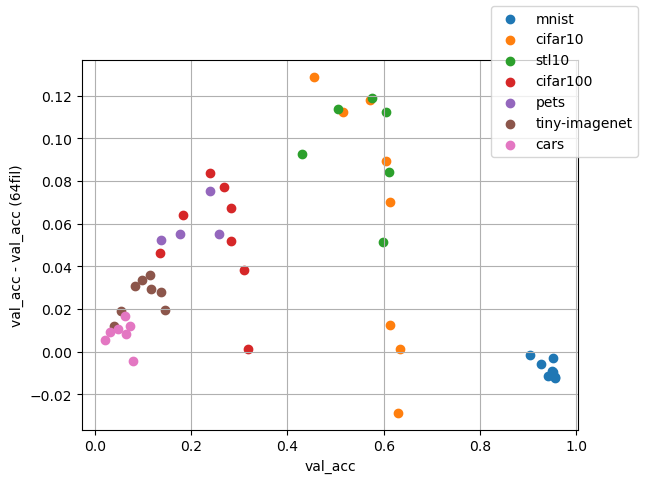

In [77]:
df_res_f1 = df_res_f1_b.sort("val_error")
# df_res_f1 = df_res_f1.filter(pl.col("train_dataset") == "mnist_train")
# df_res_f1 = df_res_f1.filter(pl.col("train_dataset") == "stl10_train")
# df_res_f1 = df_res_f1.filter(pl.col("train_num") == 1000)
# x = df_res_f1["val_acc_mf"]
# y = df_res_f1["mf_diff"]

fig, ax = plt.subplots()

# ext_col = "train_num"
ext_col = "train_dataset"
x_col = "val_acc"
y_col = "mf_diff"

for ds in df_res_f1[ext_col].unique(maintain_order=True):
    df_res_ft = df_res_f1.filter(pl.col(ext_col) == ds)
    x = df_res_ft[x_col]
    y = df_res_ft[y_col]

    ax.scatter(x, y, label=ds[:-6])

ax.set_xlabel("val_acc")
ax.set_ylabel("val_acc - val_acc (64fil)")
ax.grid()

# DS数示す
fig.legend()
fig.show()

